In [3]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [4]:
company=pd.read_csv(r"C:\Users\varsh\Downloads\\Company_Data.csv")

In [5]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Checking for null values

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### There are no null values in the data

### Checking for duplicate values

In [7]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


### There are no duplicate values in the data

### Distributions of the numerical features in the data

<Axes: xlabel='Sales', ylabel='Density'>

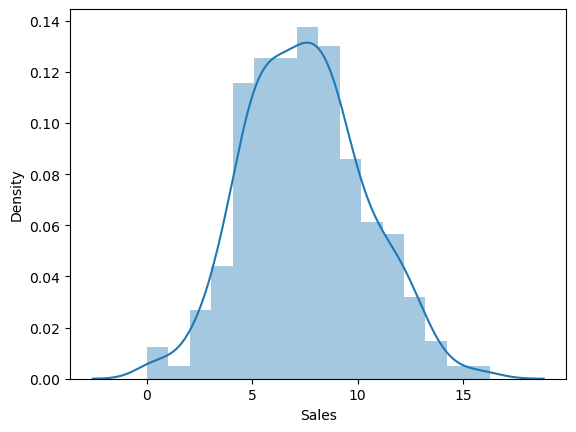

In [8]:
sns.distplot(company.Sales)

<Axes: xlabel='Income', ylabel='Density'>

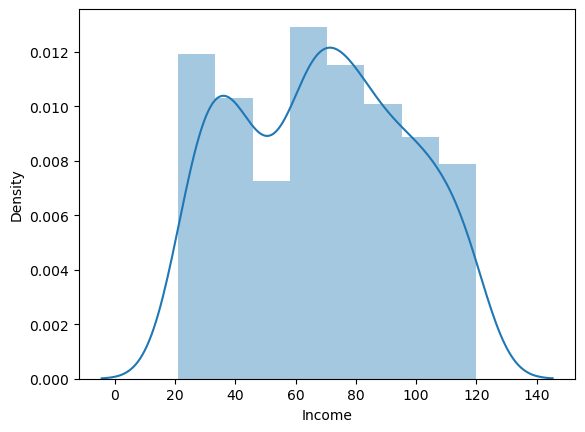

In [9]:
sns.distplot(company.Income)

<Axes: xlabel='Advertising', ylabel='Density'>

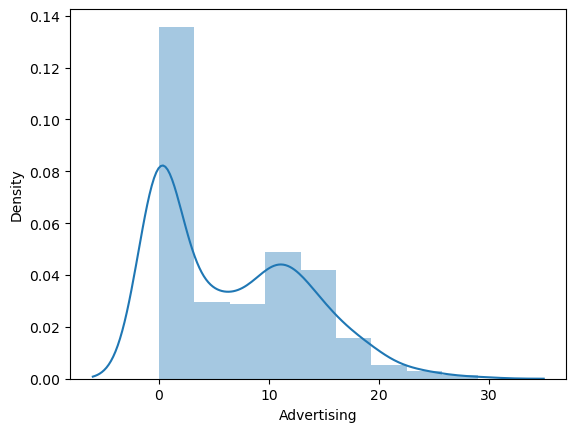

In [10]:
sns.distplot(company.Advertising)

<Axes: xlabel='Population', ylabel='Density'>

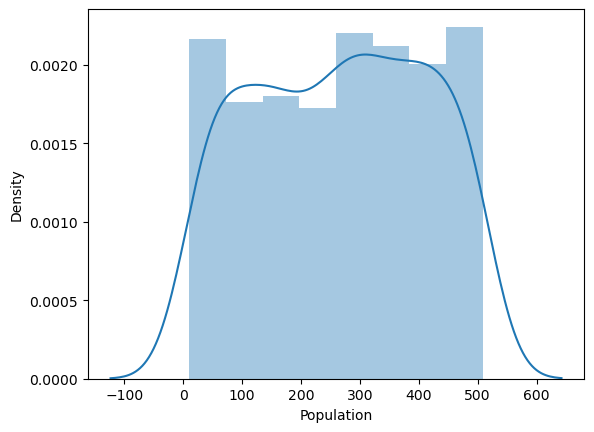

In [11]:
sns.distplot(company.Population)

<Axes: xlabel='Price', ylabel='Density'>

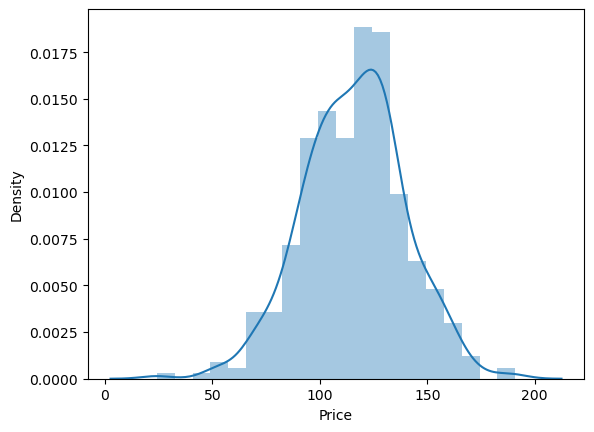

In [12]:
sns.distplot(company.Price)

<Axes: xlabel='Age', ylabel='Density'>

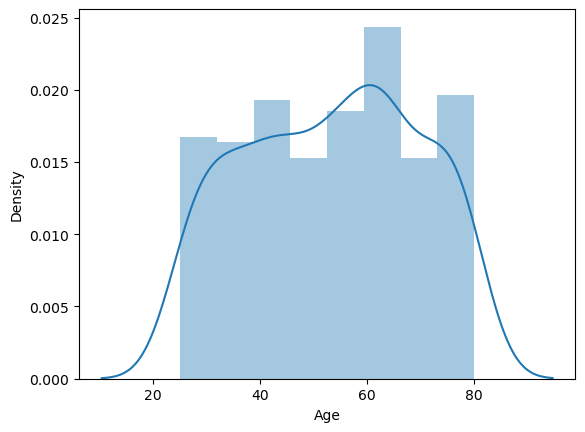

In [13]:
sns.distplot(company.Age)

<Axes: xlabel='Education', ylabel='Density'>

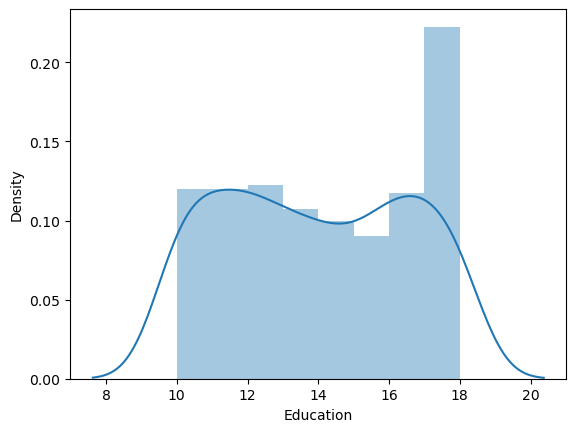

In [14]:
sns.distplot(company.Education)

### Boxplots of the numerical features in the data

Text(0.5, 1.0, 'Education')

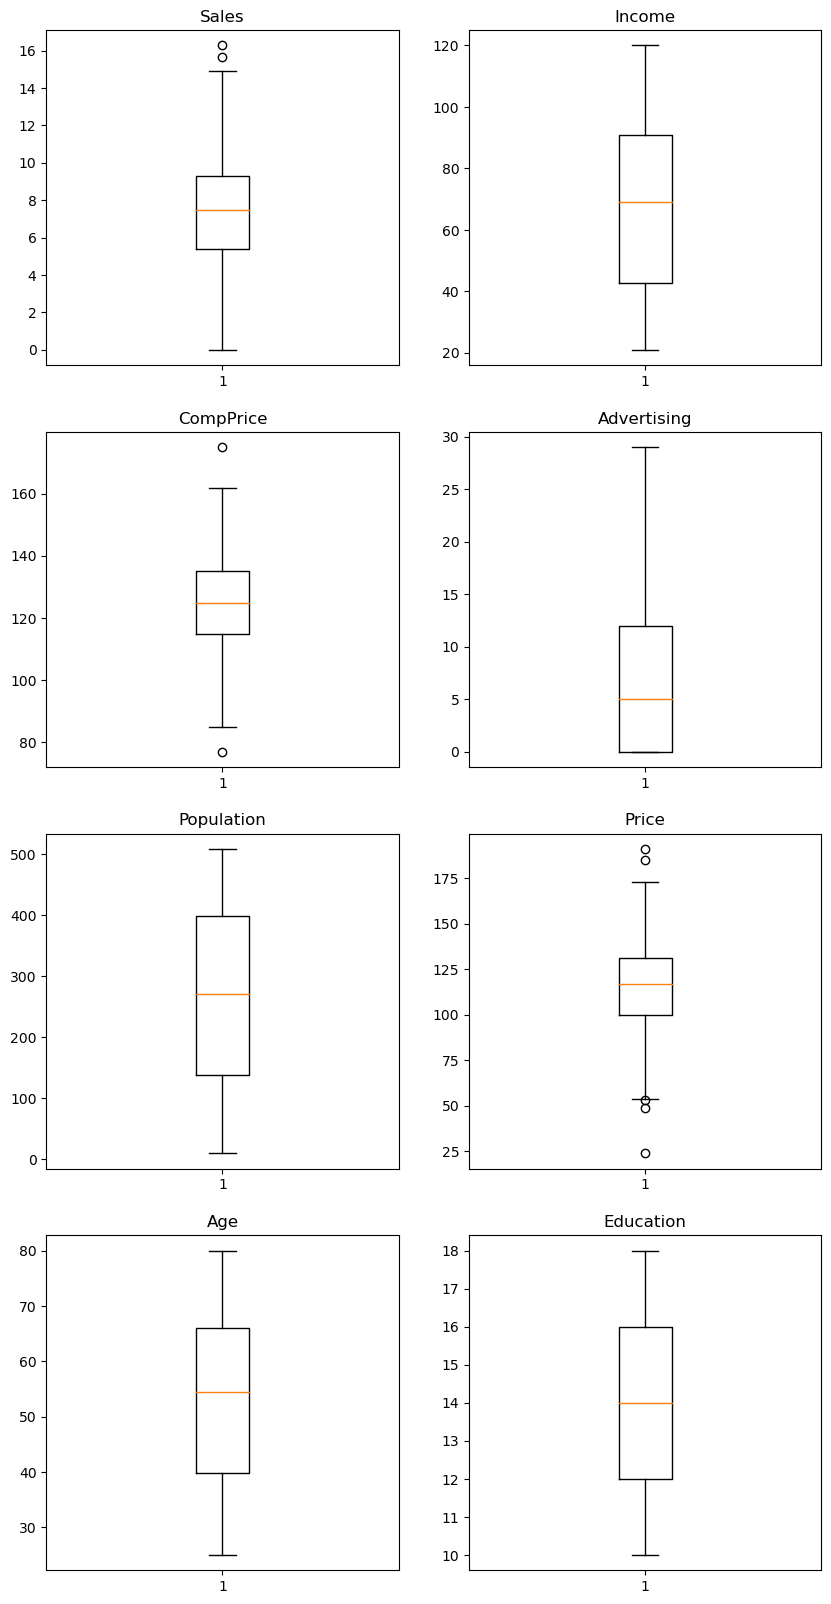

In [15]:
fig,axs=plt.subplots(4,2,figsize=(10,20))
axs[0,0].boxplot(company.Sales)
axs[0,1].boxplot(company.Income)
axs[1,0].boxplot(company.CompPrice)
axs[1,1].boxplot(company.Advertising)
axs[2,0].boxplot(company.Population)
axs[2,1].boxplot(company.Price)
axs[3,0].boxplot(company.Age)
axs[3,1].boxplot(company.Education)
axs[0,0].set_title("Sales")
axs[0,1].set_title("Income")
axs[1,0].set_title("CompPrice")
axs[1,1].set_title("Advertising")
axs[2,0].set_title("Population")
axs[2,1].set_title("Price")
axs[3,0].set_title("Age")
axs[3,1].set_title("Education")


In [16]:
company.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [17]:
company.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [18]:

company.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

### Using label encoder for categorical data

#### shelveloc 
#### bad=0
#### good=1
#### medium=2

#### Urban 
#### no=0
#### yes=1

#### US 
#### no=0
#### yes=1


In [19]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [20]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


### Splitting dependant and independant variables

In [23]:
d=company.iloc[:,0]
x=company.iloc[:,0:]

In [24]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [25]:
d

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

### Binning the sales data into 4 bins

In [26]:
y=d.copy()

In [27]:
m=pd.cut(y,bins=4)

In [28]:
m.value_counts()

(4.068, 8.135]      205
(8.135, 12.202]     136
(-0.0163, 4.068]     36
(12.202, 16.27]      23
Name: Sales, dtype: int64

In [29]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [30]:
y=m

### Label encoding for the sales column

In [31]:
y

0      (8.135, 12.202]
1      (8.135, 12.202]
2      (8.135, 12.202]
3       (4.068, 8.135]
4       (4.068, 8.135]
            ...       
395    (12.202, 16.27]
396     (4.068, 8.135]
397     (4.068, 8.135]
398     (4.068, 8.135]
399    (8.135, 12.202]
Name: Sales, Length: 400, dtype: category
Categories (4, interval[float64, right]): [(-0.0163, 4.068] < (4.068, 8.135] < (8.135, 12.202] < (12.202, 16.27]]

In [32]:
le=preprocessing.LabelEncoder()

In [33]:
y=le.fit_transform(y)

In [34]:
y

array([2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 3, 3, 2, 1, 2,
       1, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 3, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 2, 3, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 3, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 3, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 3, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 1, 0, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 2, 0, 2, 2, 2,

### Splitting into train and test data

In [35]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building model(criteria used is entropy)

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Plotting the decision tree

[Text(0.5, 0.8333333333333334, 'x[0] <= 8.115\nentropy = 1.565\nsamples = 320\nvalue = [25, 162, 113, 20]'),
 Text(0.25, 0.5, 'x[0] <= 4.0\nentropy = 0.567\nsamples = 187\nvalue = [25, 162, 0, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 162\nvalue = [0, 162, 0, 0]'),
 Text(0.75, 0.5, 'x[0] <= 12.21\nentropy = 0.611\nsamples = 133\nvalue = [0, 0, 113, 20]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 113\nvalue = [0, 0, 113, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 20\nvalue = [0, 0, 0, 20]')]

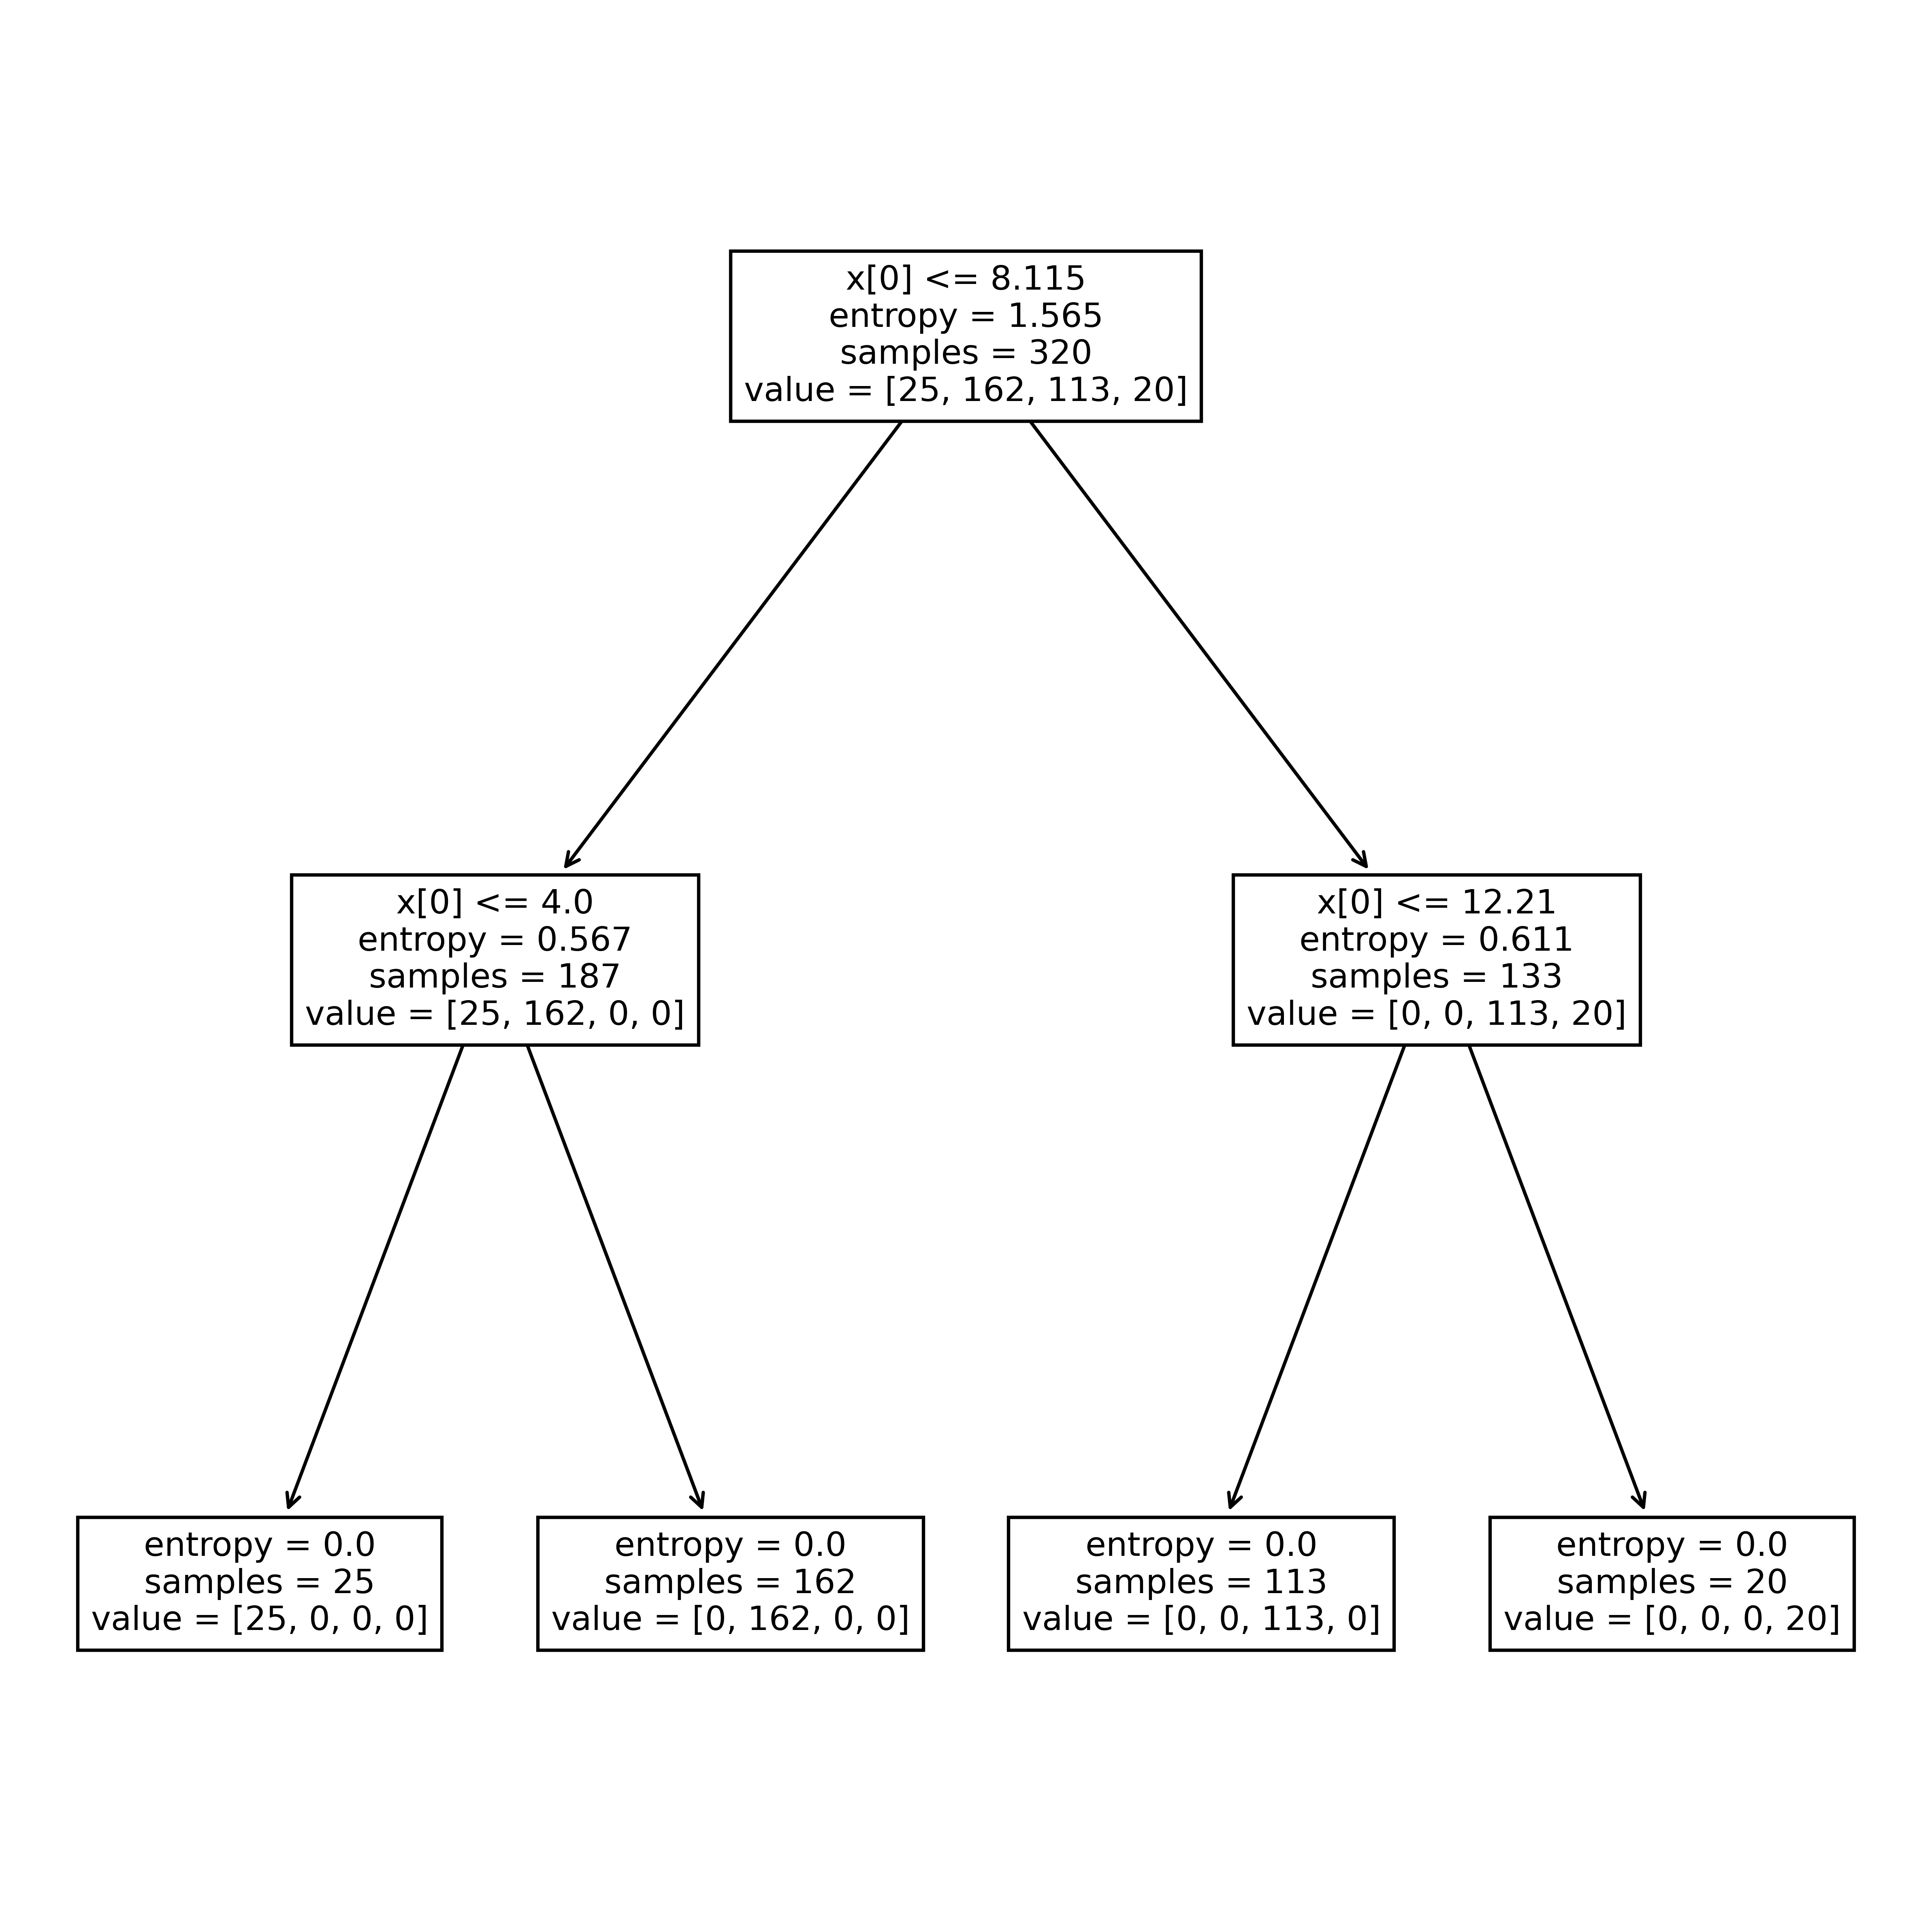

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(model)

### The classification is only depended upon the competitor price

In [38]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [39]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    43
2    23
0    11
3     3
dtype: int64

In [40]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3
row_0,,,,
0,11,0,0,0
1,0,43,0,0
2,0,0,23,0
3,0,0,0,3


In [41]:
np.mean(preds==y_test)

1.0

### The classification has a very high accuracy

### Trying to bin the sales column into 6 bins

In [42]:
y=d.copy()

[Text(0.5, 0.875, 'X[0] <= 126.5\nentropy = 2.003\nsamples = 320\nvalue = [8, 38, 119, 113, 38, 4]'),
 Text(0.3, 0.625, 'X[0] <= 109.5\nentropy = 1.04\nsamples = 165\nvalue = [8, 38, 119, 0, 0, 0]'),
 Text(0.2, 0.375, 'X[0] <= 93.5\nentropy = 0.667\nsamples = 46\nvalue = [8, 38, 0, 0, 0, 0]'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.125, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0, 0, 0, 0]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 119\nvalue = [0, 0, 119, 0, 0, 0]'),
 Text(0.7, 0.625, 'X[0] <= 142.5\nentropy = 0.966\nsamples = 155\nvalue = [0, 0, 0, 113, 38, 4]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 113\nvalue = [0, 0, 0, 113, 0, 0]'),
 Text(0.8, 0.375, 'X[0] <= 158.0\nentropy = 0.454\nsamples = 42\nvalue = [0, 0, 0, 0, 38, 4]'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 38\nvalue = [0, 0, 0, 0, 38, 0]'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 4]')]

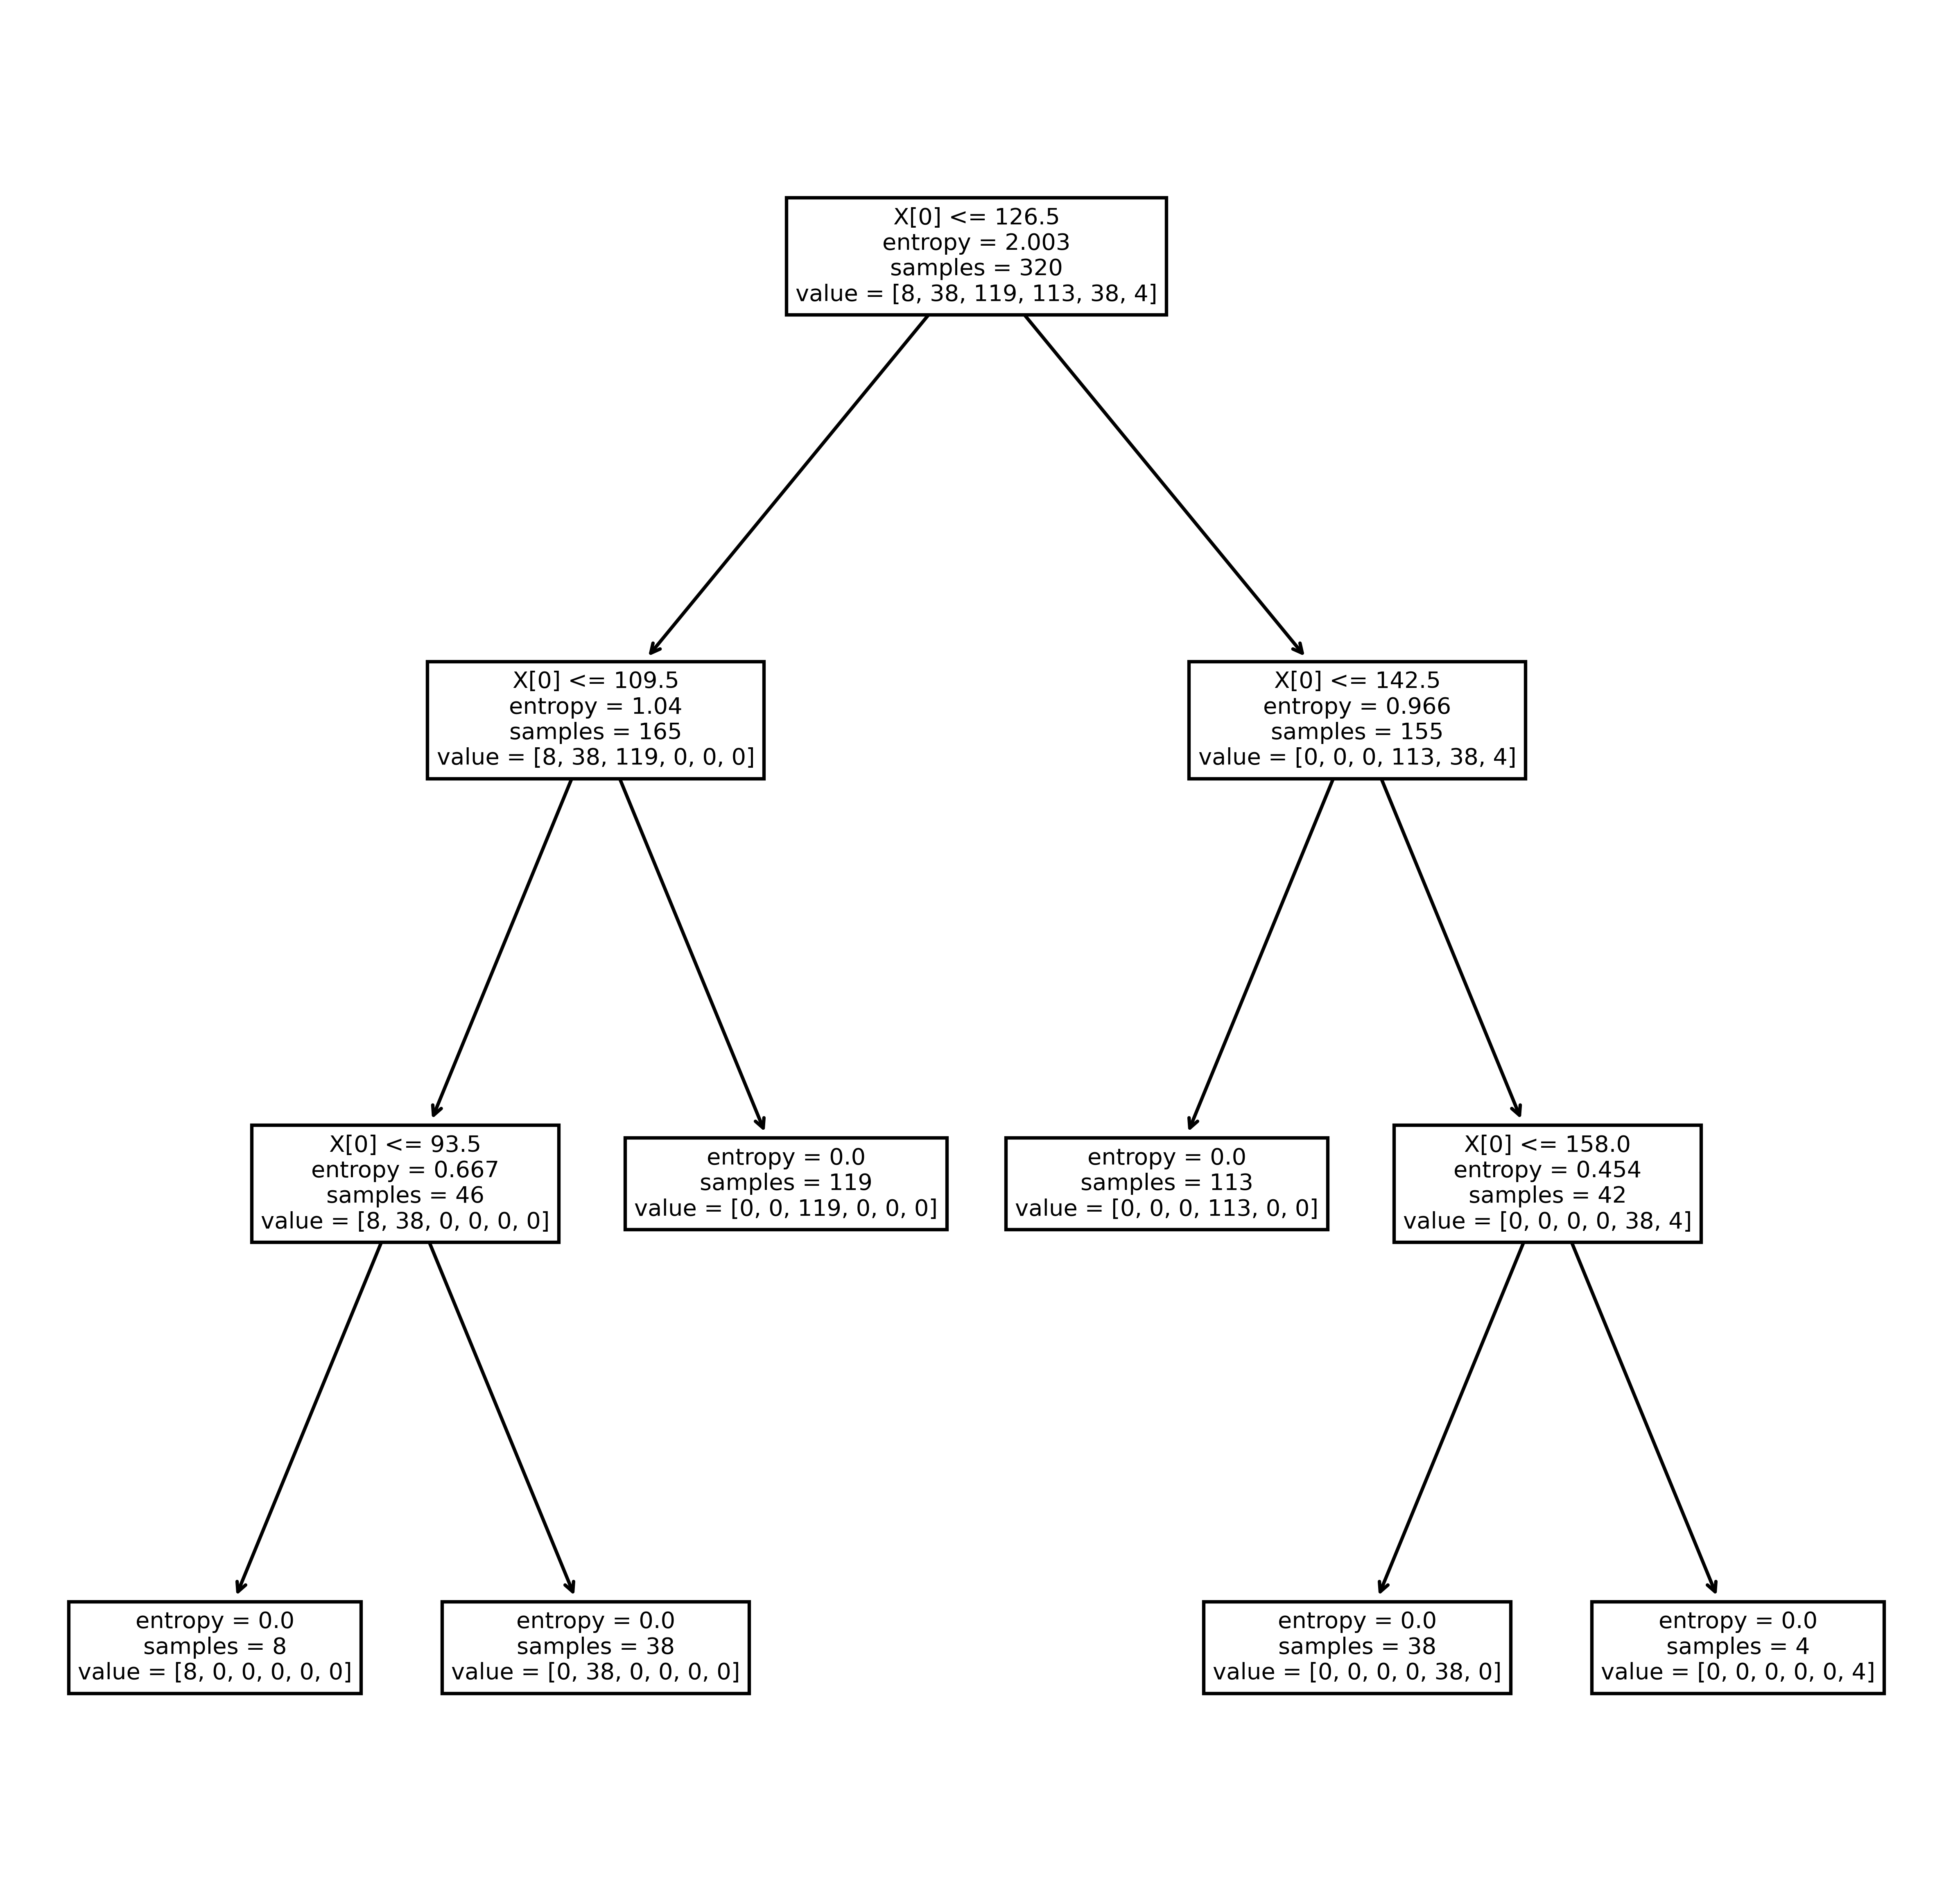

In [30]:
m=pd.cut(y,bins=6)
y=m
le=preprocessing.LabelEncoder()
y=le.fit_transform(y)
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(model)

In [43]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

### splitting into 6 bins the classification is only depended upon competitor price

In [44]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    43
2    23
0    11
3     3
dtype: int64

In [45]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3
row_0,,,,
0,11,0,0,0
1,0,43,0,0
2,0,0,23,0
3,0,0,0,3


In [46]:
np.mean(preds==y_test)

1.0

### This model also has a very high accuracy of 1